In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('details.csv')

In [4]:
legal_transaction = data[data.Class == 0]
fraud_transaction = data[data.Class == 1]

In [5]:
legal_sample = legal_transaction.sample(n=492*2)
legal_sample.shape

(984, 31)

In [6]:
new_dataset = pd.concat([legal_sample, fraud_transaction])

In [7]:
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
xg_boost = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
random_forest = RandomForestClassifier(random_state=42)
naive_bayes = BernoulliNB()
base_estimators = [naive_bayes, xg_boost, random_forest]
bagging = BaggingClassifier(base_estimator=None)
bagging.estimators_ = base_estimators
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_measure = f1_score(y_test,y_pred)
print("F-measure:", f1_measure)
print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)

F-measure: 0.9617486338797815
Accuracy :  0.9763513513513513
Precision :  0.9565217391304348
Recall :  0.967032967032967


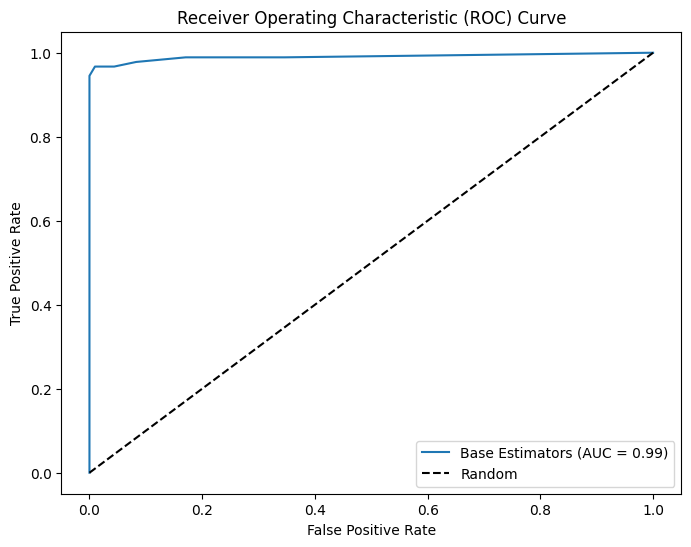

In [15]:

y_probabilities = bagging.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
auc = roc_auc_score(y_test, y_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Base Estimators (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()